# Generate synthetic data
 ##### ( 1000 samples, 2 features, and binary classification)


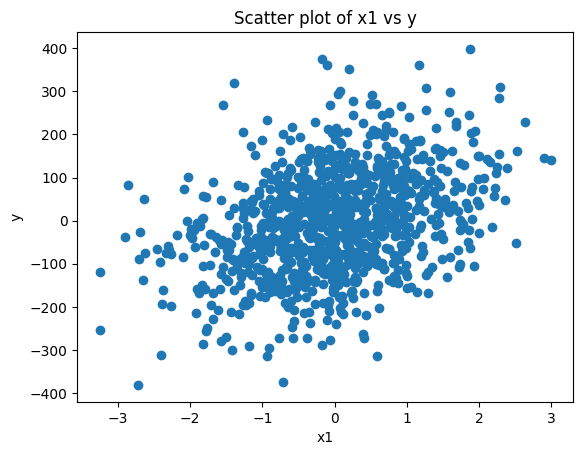

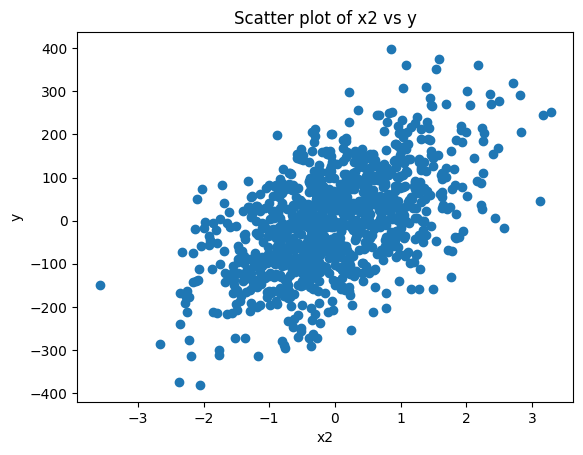

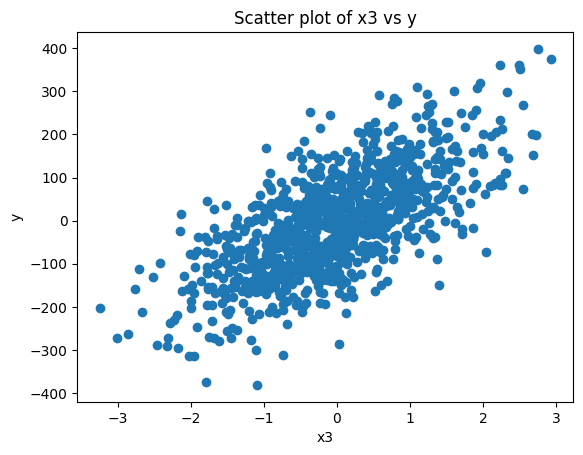

In [41]:
from sklearn.datasets import make_classification, make_regression
import pandas as pd
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=3, noise=0.1)

data = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])
data['y'] = y
data.head()

for feature in ['x1', 'x2', 'x3']:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(data[feature], data['y'])
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.title(f'Scatter plot of {feature} vs y')
    plt.show()

##### Split the data into (Train & Test)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Randomly initialize the weights vector


In [26]:
import numpy as np
weights = np.random.randn(X_train.shape[1])


## loss function   

In [27]:
def compute_loss (X, y,weights):
    N =len(y)
    predictions = np.dot(X,weights)
    loss = np.sum((y - predictions) ** 2) / (2 * N)
    return loss

### gradient descent function

In [28]:
def gradient_descent (X, y, weights,iterations,learning_rate):
    N =len(y)
    for i in range(iterations):
        predictions = np.dot(X,weights)
        derivative =-np.dot (X.T,(y-predictions))/N
        weights = weights - learning_rate * derivative
        loss = compute_loss(X, y, weights)

        if i % 10 == 0:
            print(f"Iteration {i}: Loss = {loss}")



    return weights




In [29]:
learning_rate = 0.0001
iterations = 10000
updated_weights = gradient_descent(X_train, y_train, weights, iterations,learning_rate)

Iteration 0: Loss = 6655.331271534899
Iteration 10: Loss = 6643.402411759628
Iteration 20: Loss = 6631.49494064199
Iteration 30: Loss = 6619.608819817413
Iteration 40: Loss = 6607.744010990161
Iteration 50: Loss = 6595.900475933216
Iteration 60: Loss = 6584.078176488155
Iteration 70: Loss = 6572.277074565025
Iteration 80: Loss = 6560.497132142224
Iteration 90: Loss = 6548.738311266368
Iteration 100: Loss = 6537.000574052187
Iteration 110: Loss = 6525.283882682384
Iteration 120: Loss = 6513.588199407521
Iteration 130: Loss = 6501.913486545897
Iteration 140: Loss = 6490.259706483431
Iteration 150: Loss = 6478.626821673529
Iteration 160: Loss = 6467.014794636974
Iteration 170: Loss = 6455.4235879618
Iteration 180: Loss = 6443.85316430317
Iteration 190: Loss = 6432.303486383262
Iteration 200: Loss = 6420.774516991137
Iteration 210: Loss = 6409.266218982634
Iteration 220: Loss = 6397.778555280238
Iteration 230: Loss = 6386.311488872965
Iteration 240: Loss = 6374.864982816242
Iteration 250: 

### predict the output of the test data

In [30]:
predictions = np.dot(X_test, updated_weights)
print(predictions)



[-1.58037323e+01 -5.14816184e+01 -1.15229591e+01 -4.95149382e+01
  9.50476214e+00  1.34254567e+01  8.87521251e+01 -1.02651143e+01
 -1.13382690e+02 -2.67511632e+01  5.04786728e+01 -3.89897542e+01
 -4.81299176e+01  6.03017218e+01 -1.28919411e+01  3.62863860e+01
 -9.54197916e+01  6.61595332e+01 -2.23981445e+01 -5.95125681e+01
 -8.32108202e+01  5.28210258e+01  6.08253686e+00 -1.19583860e+02
 -7.33040308e+01  1.05761775e+01 -6.62560130e+01 -6.86368960e+01
  3.29364388e+01 -3.68386104e+01  6.93605619e+01  7.88817255e+01
  6.08922471e+01 -7.51325601e+00 -4.05657386e+01 -9.35732071e+01
 -5.84629062e+01 -1.49301841e+02  1.08234413e+02  2.91906799e+01
  1.00732657e+02  5.49860082e+00 -2.96668445e+01 -5.21074418e+01
 -5.34975653e+01  2.10699770e+01 -1.86459044e+01 -6.97432007e+01
  2.45993894e+01  7.11489961e+01 -6.38082244e+01 -2.49106525e+01
 -6.71061933e+01 -4.99036123e+01  3.85796703e+01 -1.33458616e+01
 -1.45591537e+02 -1.20893309e+01 -1.01518216e+02  9.85662127e+01
  2.90702111e+01 -2.37390

#### calculating the MSE/MAE for the test data

In [31]:
mse = np.mean((y_test - predictions) ** 2)
print(f"Mean Squared Error on Test Data: {mse}")

mae = np.mean(np.abs(y_test - predictions))
print(f"Mean Absolute Error on Test Data: {mae}")


Mean Squared Error on Test Data: 2307.0468798234415
Mean Absolute Error on Test Data: 38.356103406384904
